In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### The dataset was download from Kaggle.

### Leemos los archivos csv y observamos la data

In [2]:
file_path = 'dataset/winemag-data_first150k.csv'
file2_path = 'dataset/winemag-data-130k-v2.csv'
wine_df = pd.read_csv(file_path)
wine2_df = pd.read_csv(file2_path)
wine_df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [3]:
# As we can see, there is an extra column, we proceed to delete it
# Vemos que hay una columna de mas, procedemos a eliminarla
wine_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


# Clean Data / Limpieza de datos
###### As we can see, there are to few columns with no values. For that reason we can see those particular cases in the column 'country' 
###### Como observamos que son pocas las columnas con datos nulos vamos a observar los casos particulares de la columna 'country'

In [5]:
wine_df[wine_df['country'].isna()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


##### We've identified five unnamed wines. After researching online, we can now assign each to its country of origin. We'll create a dictionary linking Chilcas to Chile, Büyülübağ to Turkey, and Tsililis to Greece.

##### Observamos que de los cinco vinos sin pais designados tienen sus respectivos nombres. Luego de una busqueda por la web podemos designar a cada vino su respectivo pais de origen. Lo haremos mediante un diccionario en el que se relacione Chilcas (Chile), Büyülübağ (Turquia), Tsililis (Grecia).

In [6]:
dic = {'Chilcas':'Chile', 'Büyülübağ':'Turkey','Tsililis':'Greece'}

indices = wine_df[wine_df['country'].isna()].index
# mi codigo con un error
#for indice in indices:
#    wine_df.iloc[indice]['country'] = dic[wine_df.iloc[indice]['winery']]

#Chatgpt:
for indice in indices:
    winery = wine_df.loc[indice, 'winery']
    if winery in dic:
        wine_df.loc[indice, 'country'] = dic[winery]

##### There isn't null space on the 'country' column. We'll drop the 'region_2' column  and handle it as a variable for other analysis on the future. Also, we'll rename the 'region_1' column as 'region'
##### Ya no hay espacios nulos en la columna 'country'
##### Ahora vamos a deshacernos de la columna 'region_2' pero conservarla en una variable por si a futuro nos sirve para otro analisis. Ademas, renombraremos la columna 'region_1' como 'region'

In [7]:
region_2 = wine_df.pop('region_2')
wine_df.rename(columns= {'region_1':'region'}, inplace=True)

# Data Analysis / Analisis de datos
## By Country / Por paises
##### For our analyisis we'll consider the qualification in five countries: USA, France, Argentina, Spain, Italy
##### Para nuestro analisis vamos a considerar la calificacion vitivinicola en 5 paises diferentes. A saber: Estados Unidos, Francia, Argentina, Espana e Italia

In [8]:
arg = wine_df[wine_df['country'] == 'Argentina']
fra = wine_df[wine_df['country'] == 'France']
usa = wine_df[wine_df['country'] == 'US']
spa = wine_df[wine_df['country'] == 'Spain']
ita = wine_df[wine_df['country'] == 'Italy']

In [9]:
arg.head(10)

,country,description,designation,points,price,province,region,variety,winery
60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,Malbec,Matias Riccitelli
62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,Malbec,Navarro Correas
111,Argentina,This copper-tinted rosé of Pinot Noir smells l...,Terroir Único Pinot Noir,86,12.0,Mendoza Province,Tupungato,Rosé,Zorzal
115,Argentina,"Aromas of prune, raisin and black plum are ful...",Reserva,86,15.0,Mendoza Province,Valle de Uco,Malbec,Viñalba
184,Argentina,"Dark, minty, inky aromas of blackberry are rug...",Trinità Grand Reserve,88,26.0,Mendoza Province,Luján de Cuyo,Bordeaux-style Red Blend,Piattelli
190,Argentina,Dark-berry aromas are crisp and show a note of...,Reserve,87,15.0,Mendoza Province,Tupungato,Malbec,Tupun
269,Argentina,"Immediately this smells raisiny, but with time...",Single Vineyard Reserva,88,15.0,Mendoza Province,Agrelo,Cabernet Sauvignon,Lamadrid
326,Argentina,"Open-grain oak aromas are out front, followed ...",Alta Barrancas Vineyards,94,50.0,Mendoza Province,Mendoza,Cabernet Sauvignon,Pascual Toso
455,Argentina,Although this San Juan SB offers almost nothin...,Alma Mora,86,10.0,Other,San Juan,Sauvignon Blanc,Finca Las Moras
460,Argentina,This boxed Malbec is burgundy-colored and open...,NaN,86,23.0,Mendoza Province,Mendoza,Malbec,Bota Box


#### We will clean the argentinian cases
#### Puliremos los casos de los vinos argentinos

In [10]:
arg[arg['province']=='Other']['region'].unique()

array(['San Juan', 'Argentina', 'Cafayate', 'Alto Valle del Río Negro',
       'La Rioja', 'Calchaquí Valley', 'Salta', 'Patagonia',
       'Tulum Valley', 'Jujuy', 'Neuquén', 'Famatina Valley',
       'Río Negro Valley', 'Aminga Valley', 'Zonda Valley', 'Catamarca',
       'Cuyo'], dtype=object)

In [11]:
dic_2 = {'San Juan':'San Juan', 'Cafayate':'Salta',
       'Alto Valle del Río Negro':'Río Negro',
       'La Rioja':'La Rioja','Calchaquí Valley': 'Salta',
       'Tulum Valley': 'San Juan','Jujuy':'Jujuy',
       'Neuquén':'Neuquén','Famatina Valley':'Catamarca',
       'Río Negro Valley':'Río Negro', 'Aminga Valley':'La Rioja',
       'Zonda Valley':'San Juan', 'Catamarca':'Catamarca', 'Salta':'Salta'}

indices_2 = arg[arg['province']=='Other'].index
# mi codigo con un error
#for indice in indices:
#    wine_df.iloc[indice]['country'] = dic[wine_df.iloc[indice]['winery']]


for indice in indices_2:
    region = arg.loc[indice, 'region']
    if region in dic_2:
        arg.loc[indice, 'province'] = dic_2[region]
        
arg[arg['province']=='Other']

,country,description,designation,points,price,province,region,variety,winery
723,Argentina,Gritty aromas of herbal berry fruits and coffe...,Familia Navarro Torrre Grand Gold Medal,86,39.0,Other,Argentina,Malbec-Cabernet Sauvignon,Bodega Las Cañitas
2140,Argentina,Sharp red-fruit aromas include notes of vinega...,NaN,82,8.0,Other,Argentina,Malbec-Bonarda,Lost Vineyards
4047,Argentina,Berry and cassis aromas turn more saucy with a...,Reserve,85,13.0,Other,Patagonia,Cabernet Sauvignon,Restivo
4351,Argentina,Berry and cassis aromas turn more saucy with a...,Reserve,85,13.0,Other,Patagonia,Cabernet Sauvignon,Restivo
4588,Argentina,Red-fruit aromas of plum and berry are earthy ...,NaN,86,13.0,Other,Patagonia,Malbec,Ruta 22
...,...,...,...,...,...,...,...,...,...
148713,Argentina,The nose offers hints of rubber and smoked mea...,Saurus Patagonia Select,84,13.0,Other,Argentina,Merlot,Familia Schroeder
148913,Argentina,"Pickled at first, while oak comes on strong as...",Saurus Patagonia Select,83,13.0,Other,Argentina,Chardonnay,Familia Schroeder
148986,Argentina,"Ripe, jammy and forward, with very little besi...",Saurus Patagonia,83,9.0,Other,Argentina,Merlot,Familia Schroeder
149073,Argentina,Good color but the nose and palate don't offer...,Saurus Patagonia,82,9.0,Other,Argentina,Cabernet Sauvignon,Familia Schroeder


In [12]:
arg.groupby('province').agg({'description':'count','points':'mean','price':'mean'}).sort_values(by='description',ascending=False)

,description,points,price
province,,,
Mendoza Province,4742,86.108182,20.858266
Salta,298,85.788591,21.270270
San Juan,199,84.361809,14.343590
Neuquén,126,85.793651,16.975806
Other,106,85.122642,18.962264
Río Negro,58,88.500000,59.224138
Catamarca,57,84.263158,13.719298
La Rioja,44,84.204545,12.068182
Jujuy,1,92.000000,66.000000


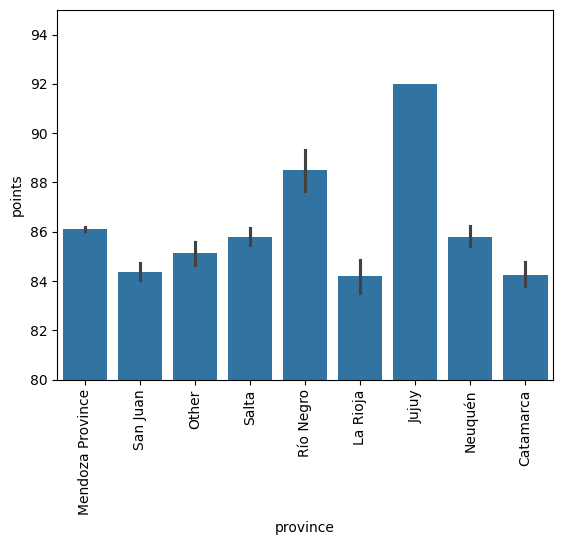

In [13]:
sns.barplot(arg, x='province',y='points')
plt.ylim(80,95)
plt.xticks(rotation=90)
plt.show()

###### Later, we will focus on the particular case of Argentina. Now, we'll compare every wine between them by country
###### Then, let focus on the relation between quality/price by country and wine type
###### Más adelante nos centraremos en el caso particular de Argentina. Por ahora compararemos entre si los productos por pais
###### Luego, concentremonos en la relacion precio calidad de cada vino segun pais y tipo de vino

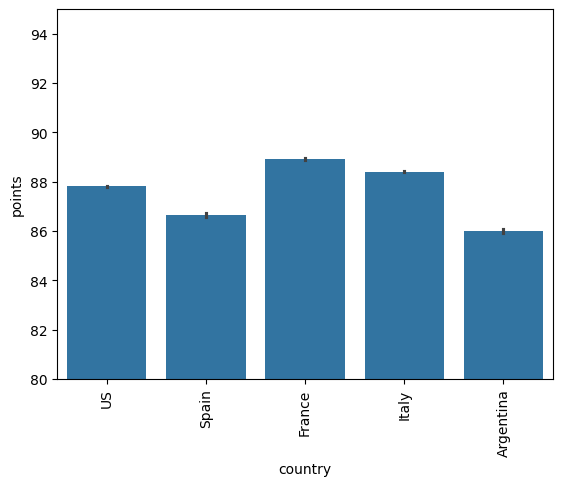

country
US           62397
Italy        23478
France       21098
Spain         8268
Argentina     5631
Name: count, dtype: int64

In [14]:
five_countries = ['Argentina','France','US','Spain','Italy']
five = wine_df[wine_df['country'].isin(five_countries)]
sns.barplot(five, x='country',y='points')
plt.ylim(80,95)
plt.xticks(rotation=90)
plt.show()
country_counts = five['country'].value_counts()
country_counts

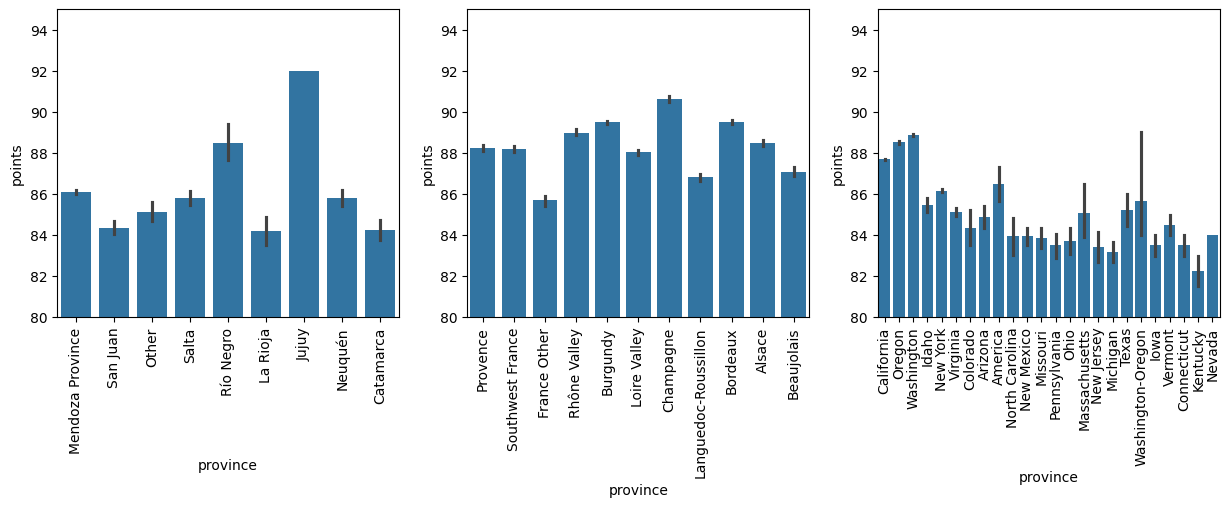

In [15]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0]= sns.barplot(arg, x='province',y='points',ax=ax[0])
ax[1]= sns.barplot(fra, x='province',y='points',ax=ax[1])
ax[2]= sns.barplot(usa, x='province',y='points',ax=ax[2])
for a in ax[:3]:  # assuming only first two axes are used
    a.set_ylim(80, 95)
    a.set_xticks(a.get_xticks())
    a.set_xticklabels(a.get_xticklabels(), rotation=90)

## Price-Quality relation / Relacion precio-calidad

#### Argentina

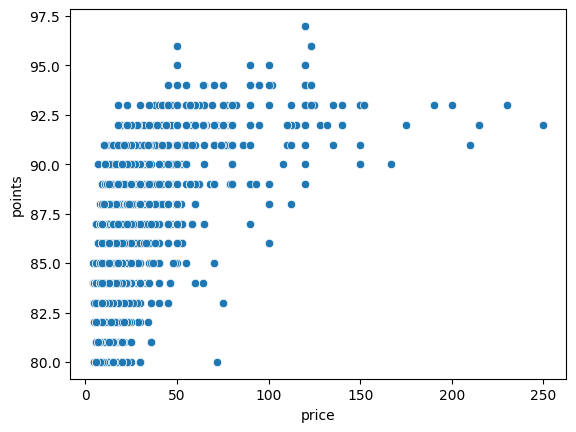

In [16]:
sns.scatterplot(arg, y='points', x='price')
plt.show()

#### Argentina's and France's wines compare by price-quality relation
#### Comparativa entre Argentina y Francia en la relacion precio-calidad

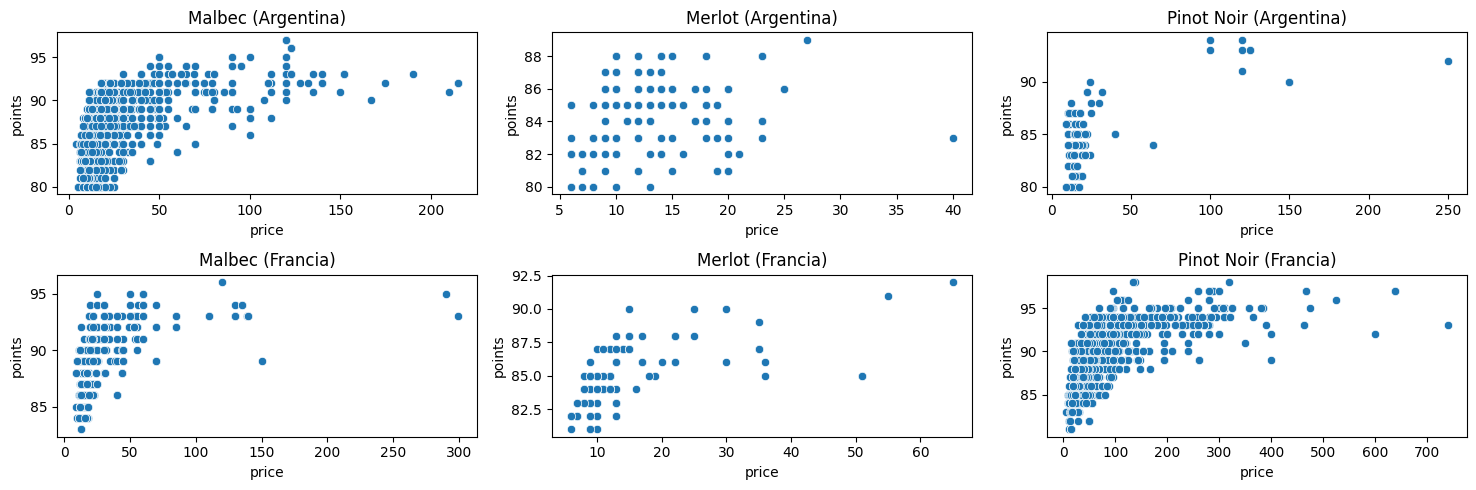

In [17]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
ax[0,0]=sns.scatterplot(arg[arg['variety']=='Malbec'],x='price',y='points', ax=ax[0,0]).set_title('Malbec (Argentina)')
ax[0,1]=sns.scatterplot(arg[arg['variety']=='Merlot'],x='price',y='points',ax=ax[0,1]).set_title('Merlot (Argentina)')
ax[0,2]=sns.scatterplot(arg[arg['variety']=='Pinot Noir'],x='price',y='points',ax=ax[0,2]).set_title('Pinot Noir (Argentina)')
ax[1,0]=sns.scatterplot(fra[fra['variety']=='Malbec'],x='price',y='points', ax=ax[1,0]).set_title('Malbec (Francia)')
ax[1,1]=sns.scatterplot(fra[fra['variety']=='Merlot'],x='price',y='points',ax=ax[1,1]).set_title('Merlot (Francia)')
ax[1,2]=sns.scatterplot(fra[fra['variety']=='Pinot Noir'],x='price',y='points',ax=ax[1,2]).set_title('Pinot Noir (Francia)')


fig.tight_layout()


#### It's difficult for us to see point by point the relation between price and quality for the argentinian wines, specially for the pinot noir. Same for France.
#### No es muy claro si existe una relacion precio-calidad

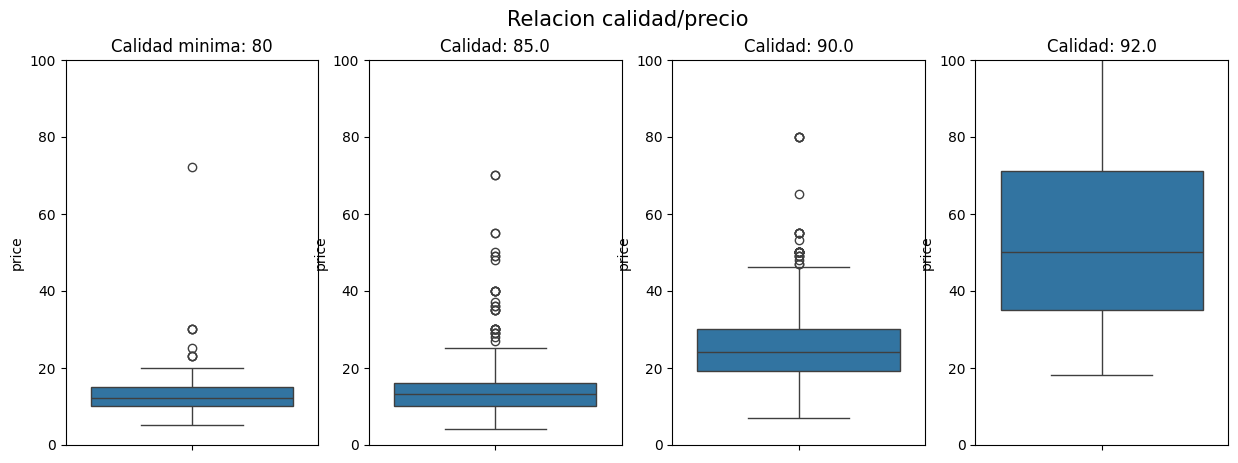

In [18]:
arg_minimo = min(arg['points'])
arg_min = arg[arg['points']== arg_minimo]

arg_qua95 = arg['points'].quantile(q=0.95)
arg_95 = arg[arg['points']== arg_qua95]

arg_qua09 = arg['points'].quantile(q=0.9)
arg_09 = arg[arg['points']== arg_qua09]

arg_qua40 = arg['points'].quantile(q=0.40)
arg_40 = arg[arg['points']== arg_qua40]

fig,ax= plt.subplots(1,4,figsize=(15,5))
ax[0] = sns.boxplot(arg_min, y='price', ax=ax[0])
ax[1] = sns.boxplot(arg_40, y='price',ax=ax[1])
ax[2] = sns.boxplot(arg_09, y='price',ax=ax[2])
ax[3] = sns.boxplot(arg_95, y='price',ax=ax[3])

title = [f'Calidad minima: {arg_minimo}', f'Calidad: {arg_qua40}',
        f'Calidad: {arg_qua09}', f'Calidad: {arg_qua95}']

for i, a in enumerate(ax[:4]):  # assuming only first two axes are used
    a.set_ylim(0, 100)
    a.set_title(title[i])
    
fig.suptitle('Relacion calidad/precio', fontsize=15)

plt.show()

##### As we can see in the boxplot, there is a few relation between price and quality. For wines with higher quality, the price increase a little bit.
##### Como podemos ver en la grafica boxplot, ahora es mas claro que a medida que la calidad del vino sube, aumenta su precio aunque minimamente

#### Argentina
###### Centremonos en Argentina

###### Siendo Mendoza la provincia productora de vino mas importante, observemos detalladamente el precio y la calidad:

In [19]:
mendoza = arg[arg['province']=='Mendoza Province']
mendoza

,country,description,designation,points,price,province,region,variety,winery
60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,Malbec,Matias Riccitelli
62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,Malbec,Navarro Correas
111,Argentina,This copper-tinted rosé of Pinot Noir smells l...,Terroir Único Pinot Noir,86,12.0,Mendoza Province,Tupungato,Rosé,Zorzal
115,Argentina,"Aromas of prune, raisin and black plum are ful...",Reserva,86,15.0,Mendoza Province,Valle de Uco,Malbec,Viñalba
184,Argentina,"Dark, minty, inky aromas of blackberry are rug...",Trinità Grand Reserve,88,26.0,Mendoza Province,Luján de Cuyo,Bordeaux-style Red Blend,Piattelli
...,...,...,...,...,...,...,...,...,...
149611,Argentina,"Lots of clove and oak on the nose, with some g...",NaN,84,10.0,Mendoza Province,Mendoza,Cabernet Sauvignon,Gouguenheim Winery
149616,Argentina,Not unkind aromas of bath oil and flowers set ...,NaN,84,8.0,Mendoza Province,Mendoza,Torrontés,Santa Julia
149622,Argentina,"Yellowish in color, with a heavy, somewhat cre...",Organic,84,13.0,Mendoza Province,Tupungato,Chardonnay,Domaine Jean Bousquet
149623,Argentina,"Dark and dense, with extracted black cherry, l...",Organic,84,13.0,Mendoza Province,Tupungato,Malbec,Domaine Jean Bousquet


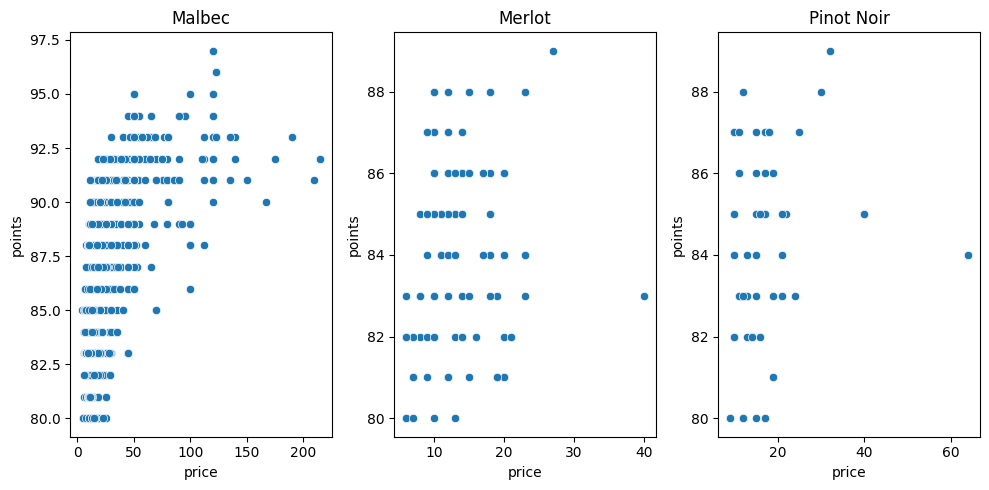

In [20]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0]=sns.scatterplot(mendoza[mendoza['variety']=='Malbec'],x='price',y='points', ax=ax[0]).set_title('Malbec')
ax[1]=sns.scatterplot(mendoza[mendoza['variety']=='Merlot'],x='price',y='points',ax=ax[1]).set_title('Merlot' )
ax[2]=sns.scatterplot(mendoza[mendoza['variety']=='Pinot Noir'],x='price',y='points',ax=ax[2]).set_title('Pinot Noir')


fig.tight_layout()

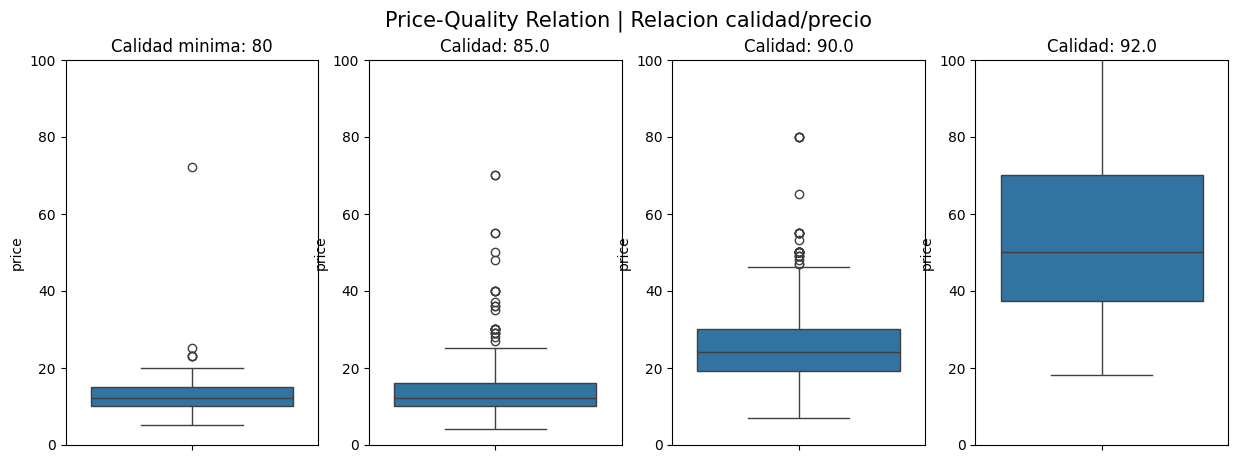

In [21]:
mdz_minimo = min(mendoza['points'])
mdz_min = mendoza[mendoza['points']== mdz_minimo]

mdz_qua95 = mendoza['points'].quantile(q=0.95)
mdz_95 = mendoza[mendoza['points']== mdz_qua95]

mdz_qua09 = mendoza['points'].quantile(q=0.9)
mdz_09 = mendoza[mendoza['points']== mdz_qua09]

mdz_qua40 = mendoza['points'].quantile(q=0.40)
mdz_40 = mendoza[mendoza['points']== mdz_qua40]

fig,ax= plt.subplots(1,4,figsize=(15,5))
ax[0] = sns.boxplot(mdz_min, y='price', ax=ax[0])
ax[1] = sns.boxplot(mdz_40, y='price',ax=ax[1])
ax[2] = sns.boxplot(mdz_09, y='price',ax=ax[2])
ax[3] = sns.boxplot(mdz_95, y='price',ax=ax[3])

title = [f'Calidad minima: {mdz_minimo}', f'Calidad: {mdz_qua40}',
        f'Calidad: {mdz_qua09}', f'Calidad: {mdz_qua95}']

for i, a in enumerate(ax[:4]):  # assuming only first two axes are used
    a.set_ylim(0, 100)
    a.set_title(title[i])
    
fig.suptitle('Price-Quality Relation | Relacion calidad/precio', fontsize=15)

plt.show()

##### Vemos que el caso de Mendoza es muy similar al del pais. Esto quizas se deba a la cantidad de vinos producidos en la provincia en comparacion con el resto.

In [22]:
other_province = arg[arg['province']!='Mendoza Province']['province'].value_counts()
other_province

province
Salta        298
San Juan     199
Neuquén      126
Other        106
Río Negro     58
Catamarca     57
La Rioja      44
Jujuy          1
Name: count, dtype: int64

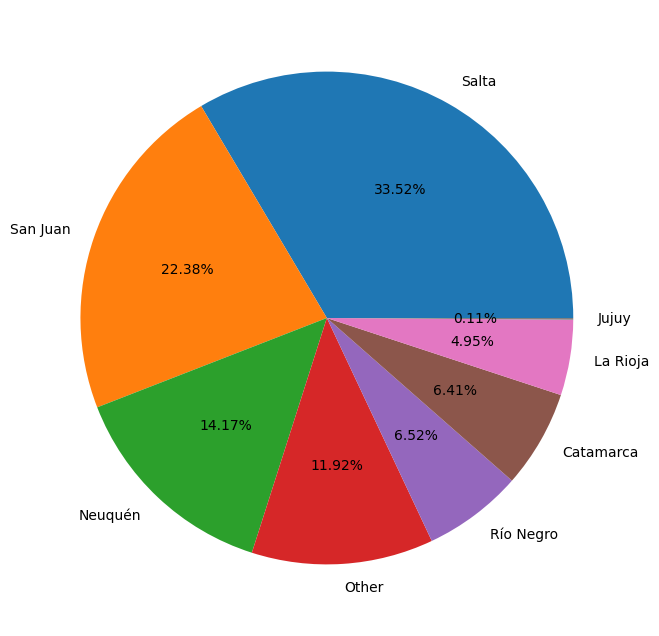

In [23]:
plt.figure(figsize=(8,8))
#plt.pie(other_province,autopct="%.2f%%")
other_province.plot(kind='pie', autopct="%.2f%%")
plt.ylabel("")
plt.show()

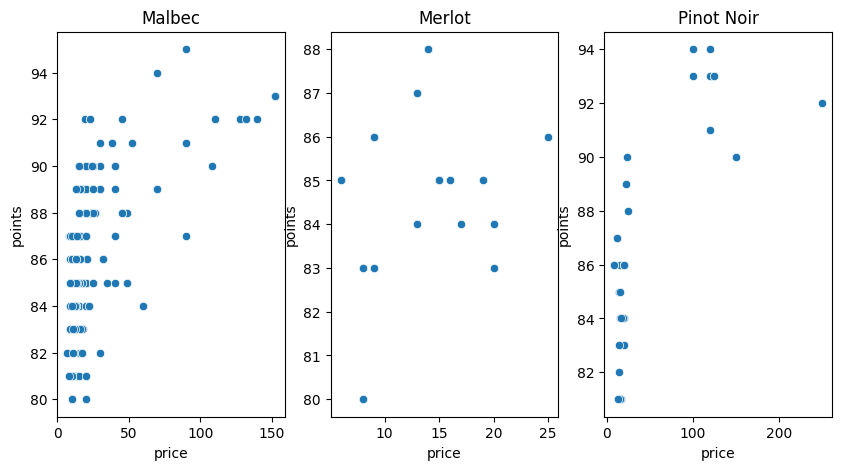

In [24]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0]=sns.scatterplot(arg[(arg['variety']=='Malbec') & (arg['province'] != 'Mendoza Province')],x='price',y='points', ax=ax[0]).set_title('Malbec')
ax[1]=sns.scatterplot(arg[(arg['variety']=='Merlot') & (arg['province'] != 'Mendoza Province')],x='price',y='points',ax=ax[1]).set_title('Merlot' )
ax[2]=sns.scatterplot(arg[(arg['variety']=='Pinot Noir') & (arg['province'] != 'Mendoza Province')],x='price',y='points',ax=ax[2]).set_title('Pinot Noir')

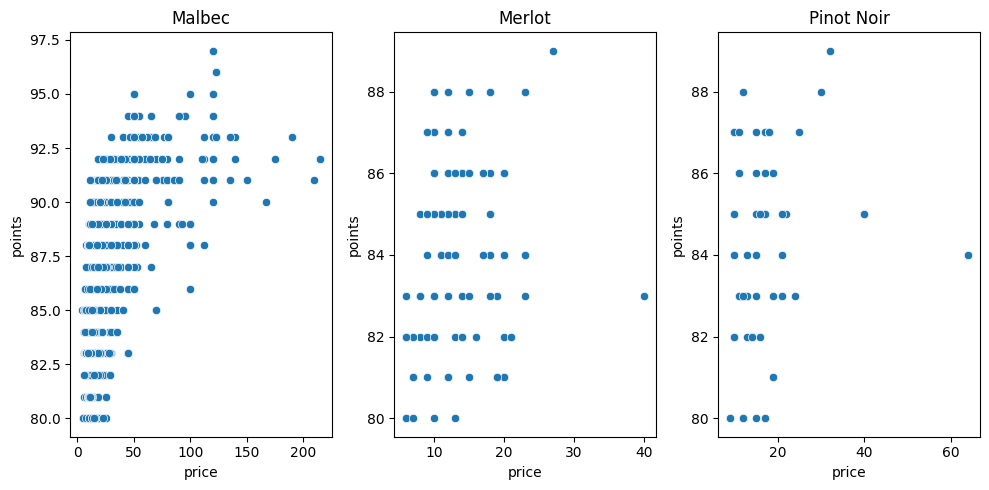

In [25]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
ax[0]=sns.scatterplot(mendoza[mendoza['variety']=='Malbec'],x='price',y='points', ax=ax[0]).set_title('Malbec')
ax[1]=sns.scatterplot(mendoza[mendoza['variety']=='Merlot'],x='price',y='points',ax=ax[1]).set_title('Merlot' )
ax[2]=sns.scatterplot(mendoza[mendoza['variety']=='Pinot Noir'],x='price',y='points',ax=ax[2]).set_title('Pinot Noir')


fig.tight_layout()

In [26]:
mdz_regiones = mendoza.groupby('region').agg({'points':'mean', 'price':'mean'})

<Axes: xlabel='region'>

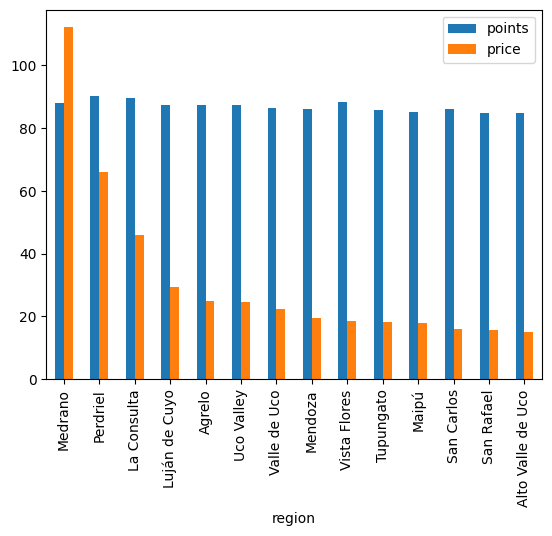

In [27]:
mdz_regiones.sort_values(by='price', ascending=False).plot(kind='bar')

### France | Francia

###### Same for France
###### Lo mismo sucede con Francia

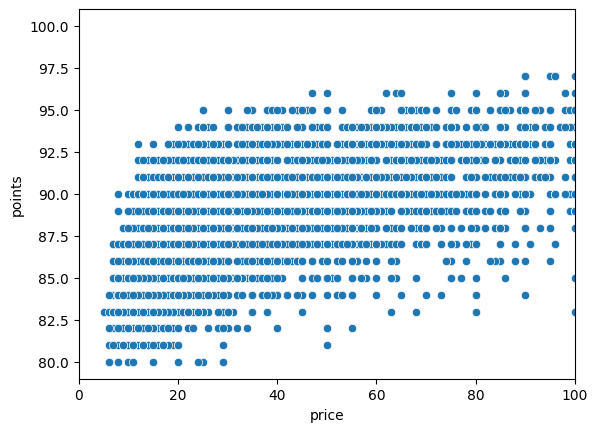

In [28]:
sns.scatterplot(fra, y='points', x='price')
plt.xlim(0,100)

plt.show()

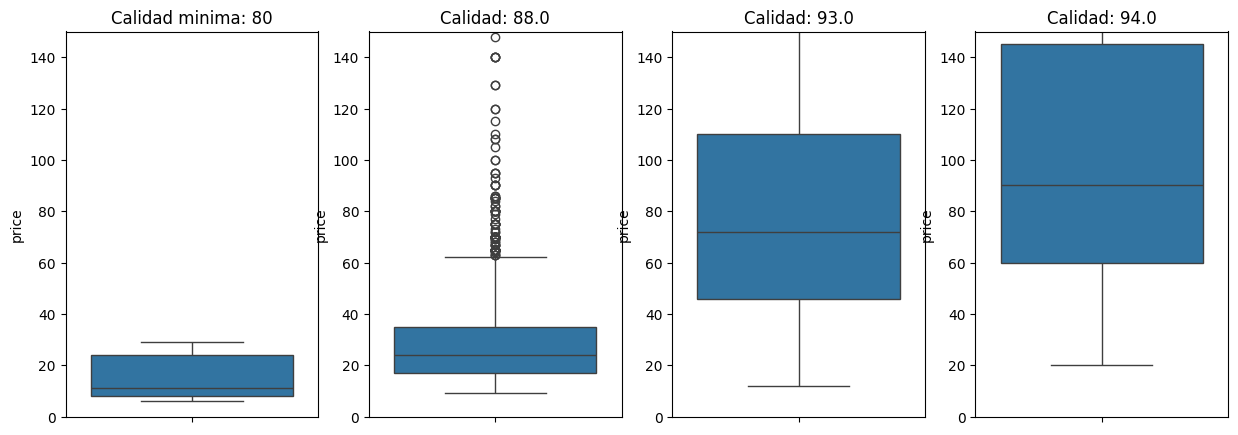

In [31]:
fra_minimo = min(fra['points'])
fra_min = fra[fra['points']== fra_minimo]

fra_qua95 = fra['points'].quantile(q=0.95)
fra_95 = fra[fra['points']== fra_qua95]

fra_qua09 = fra['points'].quantile(q=0.9)
fra_09 = fra[fra['points']== fra_qua09]

fra_qua40 = fra['points'].quantile(q=0.40)
fra_40 = fra[fra['points']== fra_qua40]

fig,ax= plt.subplots(1,4,figsize=(15,5))
ax[0] = sns.boxplot(fra_min, y='price', ax=ax[0])
ax[1] = sns.boxplot(fra_40, y='price',ax=ax[1])
ax[2] = sns.boxplot(fra_09, y='price',ax=ax[2])
ax[3] = sns.boxplot(fra_95, y='price',ax=ax[3])

title = [f'Calidad minima: {fra_minimo}', f'Calidad: {fra_qua40}',
        f'Calidad: {fra_qua09}', f'Calidad: {fra_qua95}']

for i, a in enumerate(ax[:4]):  # assuming only first two axes are used
    a.set_ylim(0, 150)
    a.set_title(title[i])
    
plt.show()

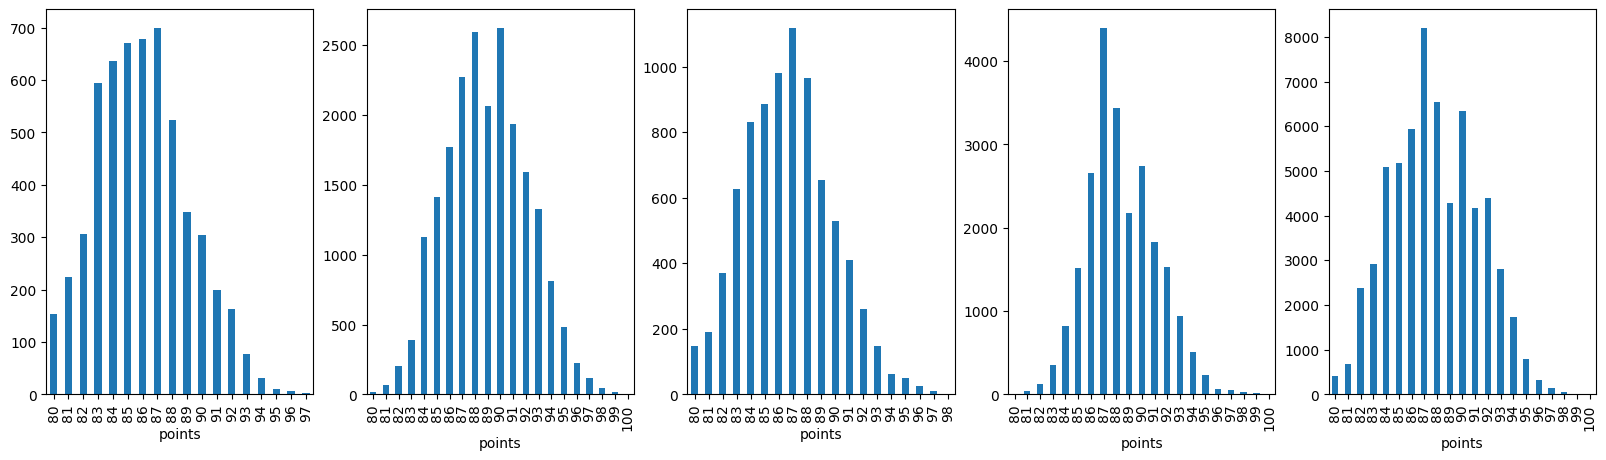

In [53]:
fig,ax = plt.subplots(1,5,figsize=(20,5))
ax[0] = arg.groupby('points')['variety'].size().plot(kind='bar', ax=ax[0])
ax[1] = fra.groupby('points')['variety'].size().plot(kind='bar', ax = ax[1])
ax[2] = spa.groupby('points')['variety'].size().plot(kind='bar', ax = ax[2])
ax[3] = ita.groupby('points')['variety'].size().plot(kind='bar', ax = ax[3])
ax[4] = usa.groupby('points')['variety'].size().plot(kind='bar', ax = ax[4])

###### All the countries of our analysis have a normal distribution of wines by their quality. Most common wines are the middles one, lower and higher quality are most rarely. Argentina is the only country that slide their distribution a little bit to the left (to the lowest quality)

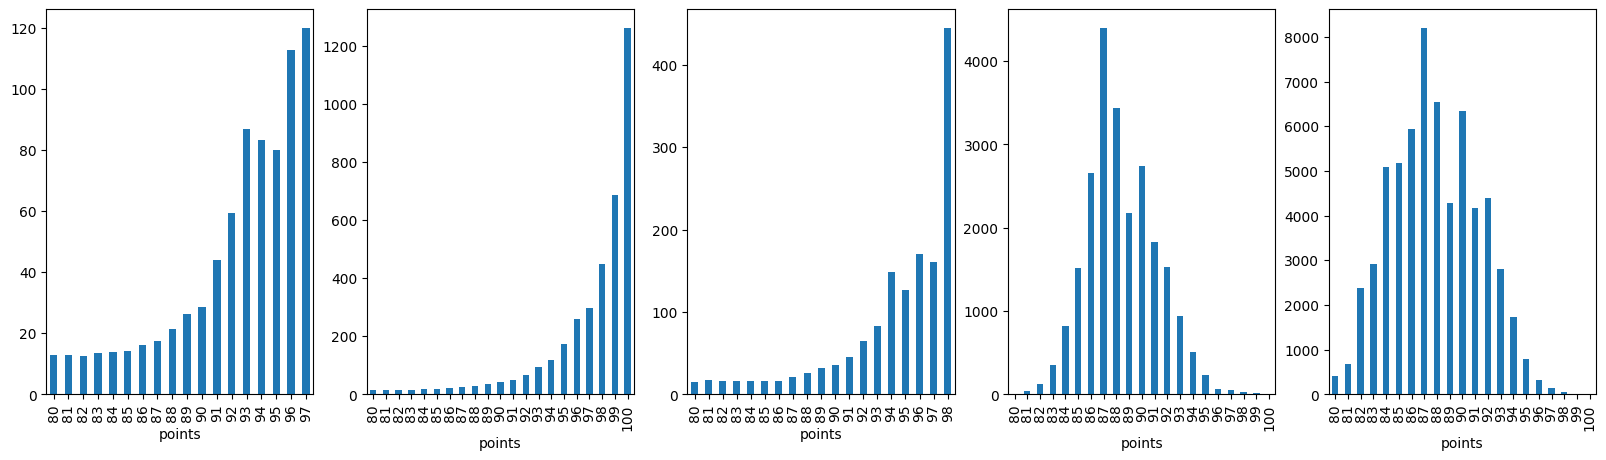

In [55]:
fig, ax = plt.subplots(1,5,figsize = (20,5))
ax[0] = arg.groupby('points')['price'].mean().plot(kind='bar', ax=ax[0])
ax[1] = fra.groupby('points')['price'].mean().plot(kind='bar', ax=ax[1])
ax[2] = spa.groupby('points')['price'].mean().plot(kind='bar', ax=ax[2])
ax[3] = ita.groupby('points')['price'].size().plot(kind='bar', ax = ax[3])
ax[4] = usa.groupby('points')['price'].size().plot(kind='bar', ax = ax[4])


###### As we can see, the price and quality have a proportional relation in Argentina, France and Spain. But in USA and Italy, there is an interest distribution: the higher price are in the middle quality wines.

<Axes: xlabel='points'>

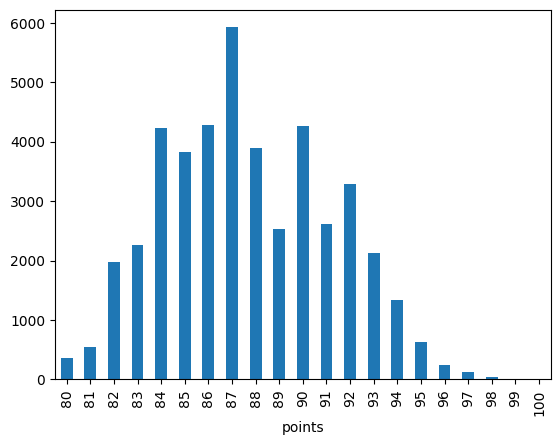

In [64]:
usa[usa['province']=='California'].groupby('points').size().plot(kind = 'bar')